In [1]:
from pynq.overlays.base import BaseOverlay

In [1]:
from rtlsdr import RtlSdr

# Get a list of detected device serial numbers (str)
serial_numbers = RtlSdr.get_device_serial_addresses()
print(serial_numbers)

['001', '002', '003', '004']


['001', '002', '003', '004']


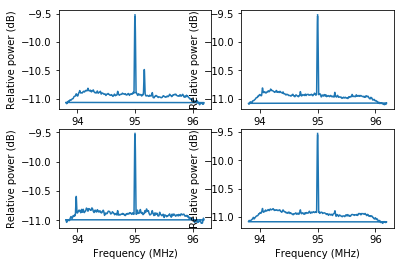

In [112]:
from matplotlib.pylab import *
from rtlsdr import *
import numpy as np
import scipy.signal as sgn
from scipy.fftpack import fft, fftshift, ifft,fftfreq

serial_number = RtlSdr.get_device_serial_addresses()
print(serial_number)
sdr_ar = []
for i in range(0, size(serial_number)):
    sdri = RtlSdr(RtlSdr.get_device_index_by_serial(serial_number[i]))
    sdr_ar.append(sdri)

sr = 2.4e6
cf = 95e6
ga = 4
# configure device
if isinstance(sr, list) & isinstance(cf, list) & isinstance(ga, list):
    if len(sdr_ar) == len(sr) == len(cf) == len(ga):
        for i in range(0, len(sdr_ar)):
            sdr_ar[i].samp_rate = sr[i]
            sdr_ar[i].center_freq = cf[i]
            sdr_ar[i].gain = ga[i]
    else:
        for i in range(0, size(serial_number)):
            sdr_ar[i].close()
        print("Number of Parameters is inequal to Numbers of Receivers")
elif (isinstance(sr, float) | isinstance(sr, int)) & (isinstance(cf, float) | isinstance(cf, int)) & (isinstance(ga, float)| isinstance(ga, int)):
    for i in range(0, len(sdr_ar)):
        sdr_ar[i].samp_rate = sr
        sdr_ar[i].center_freq = cf
        sdr_ar[i].gain = ga
else:
    for i in range(0, size(serial_number)):
        sdr_ar[i].close()
    print("Number of Parameters is inequal to Numbers of Receivers")

# generating 4 samples
# TODO: vectorization
n_fft = 1024
num_samp = 256
samples0 = np.array(sdr_ar[0].read_samples(num_samp * n_fft))
sdr_ar[0].close()
samples1 = np.array(sdr_ar[1].read_samples(num_samp * n_fft))
sdr_ar[1].close()
samples2 = np.array(sdr_ar[2].read_samples(num_samp * n_fft))
sdr_ar[2].close()
samples3 = np.array(sdr_ar[3].read_samples(num_samp * n_fft))
sdr_ar[3].close()
for i in range(0, size(serial_number) - 1):
    sdr_ar[i].close()
#

# use matplotlib to estimate and plot the PSD
figure(1)
subplot(2,2,1)
[f1,Pxx1]=sgn.welch(samples0,sr,nperseg=num_samp,nfft=n_fft,detrend=False,return_onesided=False)
# Pxx1=fftshift(Pxx1)
plot(f1/1e6+cf/1e6,np.log10(Pxx1))
xlabel('Frequency (MHz)')
ylabel('Relative power (dB)')

figure(1)
subplot(2,2,2)
[f2,Pxx2]=sgn.welch(samples1,sr,nperseg=num_samp,nfft=n_fft,detrend=False,return_onesided=False)
# Pxx2=fftshift(Pxx2)
plot(f2/1e6+cf/1e6,np.log10(Pxx2))
xlabel('Frequency (MHz)')
ylabel('Relative power (dB)')

figure(1)
subplot(2,2,3)
[f3,Pxx3]=sgn.welch(samples2,sr,nperseg=num_samp,nfft=n_fft,detrend=False,return_onesided=False)
# Pxx3=fftshift(Pxx3)
plot(f3/1e6+cf/1e6,np.log10(Pxx3))
xlabel('Frequency (MHz)')
ylabel('Relative power (dB)')

figure(1)
subplot(2,2,4)
[f4,Pxx4]=sgn.welch(samples3,sr,nperseg=num_samp,nfft=n_fft,detrend=False,return_onesided=False)
# Pxx4=fftshift(Pxx4)
plot(f4/1e6+cf/1e6,np.log10(Pxx4))
xlabel('Frequency (MHz)')
ylabel('Relative power (dB)')
show()

In [16]:
print(RtlSdr.get_device_index_by_serial(serial_number[0]))

0


In [27]:
p=(6!=1)+(1!=2)+(1!=1)
print(p)

2


In [58]:
import numpy as np
a=np.array([1,2,3])
b=np.array([3,4,5])
c=np.array([a,b])
d=np.zeros(4)
print(c)
print(c[0,:])
print(np.size(c[:,1]))
print(d)
d[0]=np.array([1,2,3])
print(d)

[[1 2 3]
 [3 4 5]]
[1 2 3]
2
[ 0.  0.  0.  0.]


ValueError: setting an array element with a sequence.

In [34]:
isinstance(33,int)

True

In [64]:
p=range(0,4)
print(p)

range(0, 4)
